In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest


In [16]:
df = pd.read_csv("/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv")

In [17]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [19]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [20]:
df.duplicated().sum()

0

 Identify and analyze spatial patterns in property prices. Is there a correlation between neighborhood type and property values? Implement geospatial visualization tools for insights

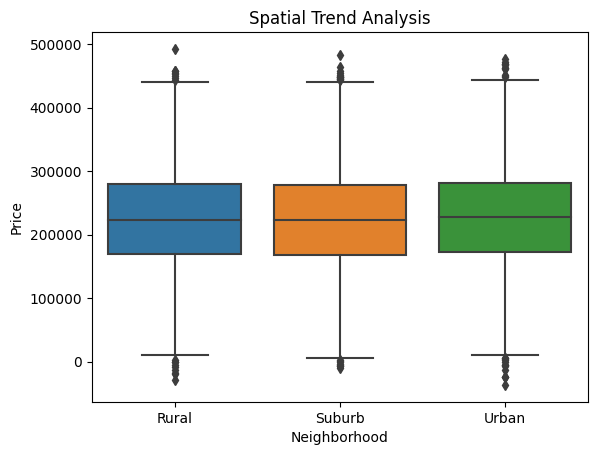

In [21]:
sns.boxplot(x='Neighborhood', y='Price', data=df)
plt.title('Spatial Trend Analysis')
plt.show()

Explore how property prices have evolved over time. Are there trends based on the year of construction? Use time-series analysis to uncover patterns and make predictions

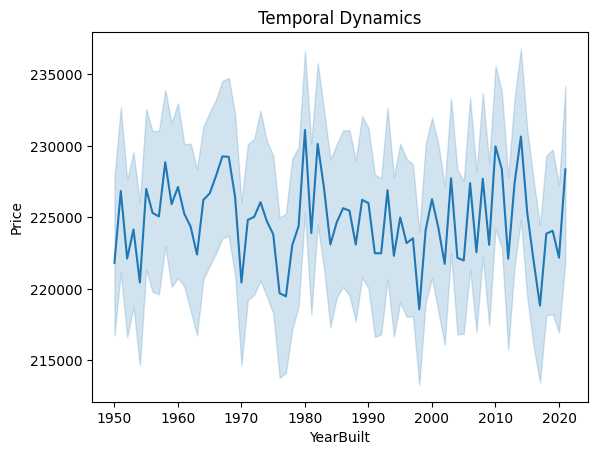

In [22]:
df['YearBuilt'] = pd.to_datetime(df['YearBuilt'], format='%Y')
df['YearBuilt'] = df['YearBuilt'].dt.year
sns.lineplot(x='YearBuilt', y='Price', data=df)
plt.title('Temporal Dynamics')
plt.show()

<Axes: >

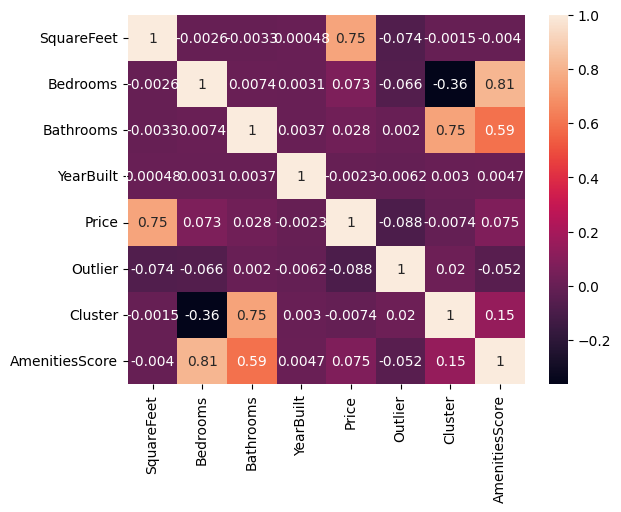

In [31]:
sns.heatmap(df.drop('Neighborhood', axis=1).corr(), annot=True)

In [32]:
dublicate_data = df[df.drop('Price', axis=1).duplicated(keep=False)].sort_values(['SquareFeet', 'Bedrooms', 'Neighborhood', 'YearBuilt', 'Price'])
print(f"Number of houses with the same parameters but different costs:{dublicate_data.shape[0]}")
dublicate_data.head(20)

Number of houses with the same parameters but different costs:288


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Outlier,Cluster,AmenitiesScore
38621,1020,2,2,Suburb,1963,132662.437768,-1,1,4
40114,1020,2,2,Suburb,1963,152360.276197,-1,1,4
44058,1024,2,2,Suburb,2005,62628.424230,-1,1,4
6383,1024,2,2,Suburb,2005,134253.856692,-1,1,4
30423,1043,5,3,Rural,1978,115183.430539,-1,2,8
48076,1043,5,3,Rural,1978,128904.872768,-1,2,8
3049,1049,3,3,Suburb,1988,133669.985148,1,2,6
31907,1049,3,3,Suburb,1988,149061.777992,1,2,6
5288,1054,4,1,Rural,2002,120847.048990,-1,0,5
10325,1054,4,1,Rural,2002,125169.666526,-1,0,5


In [33]:
df.drop(df[df.Price <= 0].index, axis=0, inplace=True) # We'll remove houses with a negative price

In [35]:
df.drop_duplicates(keep=False, inplace=True) # Delete all records containing duplicates

In [37]:
from sklearn.preprocessing import LabelEncoder
df.Neighborhood = LabelEncoder().fit_transform(df.Neighborhood) # Let's encode the Neighborhood feature
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Outlier,Cluster,AmenitiesScore
0,2126,4,1,0,1969,215355.283618,1,0,5
1,2459,3,2,0,1980,195014.221626,1,1,5
2,1860,2,1,1,1970,306891.012076,-1,1,3
3,2294,2,1,2,1996,206786.787153,1,1,3
4,2130,5,2,1,2001,272436.239065,-1,0,7


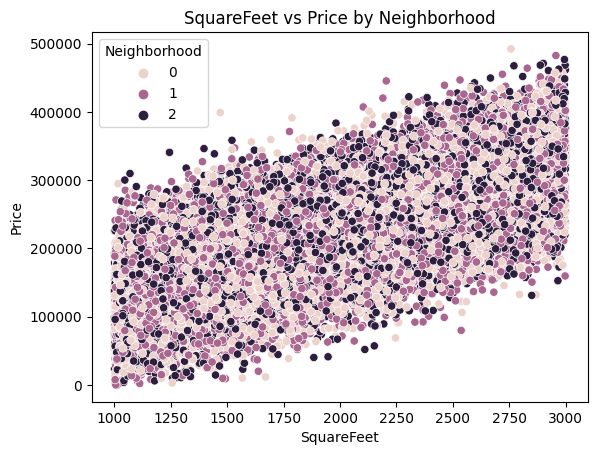

In [44]:
sns.scatterplot(x='SquareFeet', y='Price', hue='Neighborhood', data=df)
plt.title('SquareFeet vs Price by Neighborhood')
plt.show()

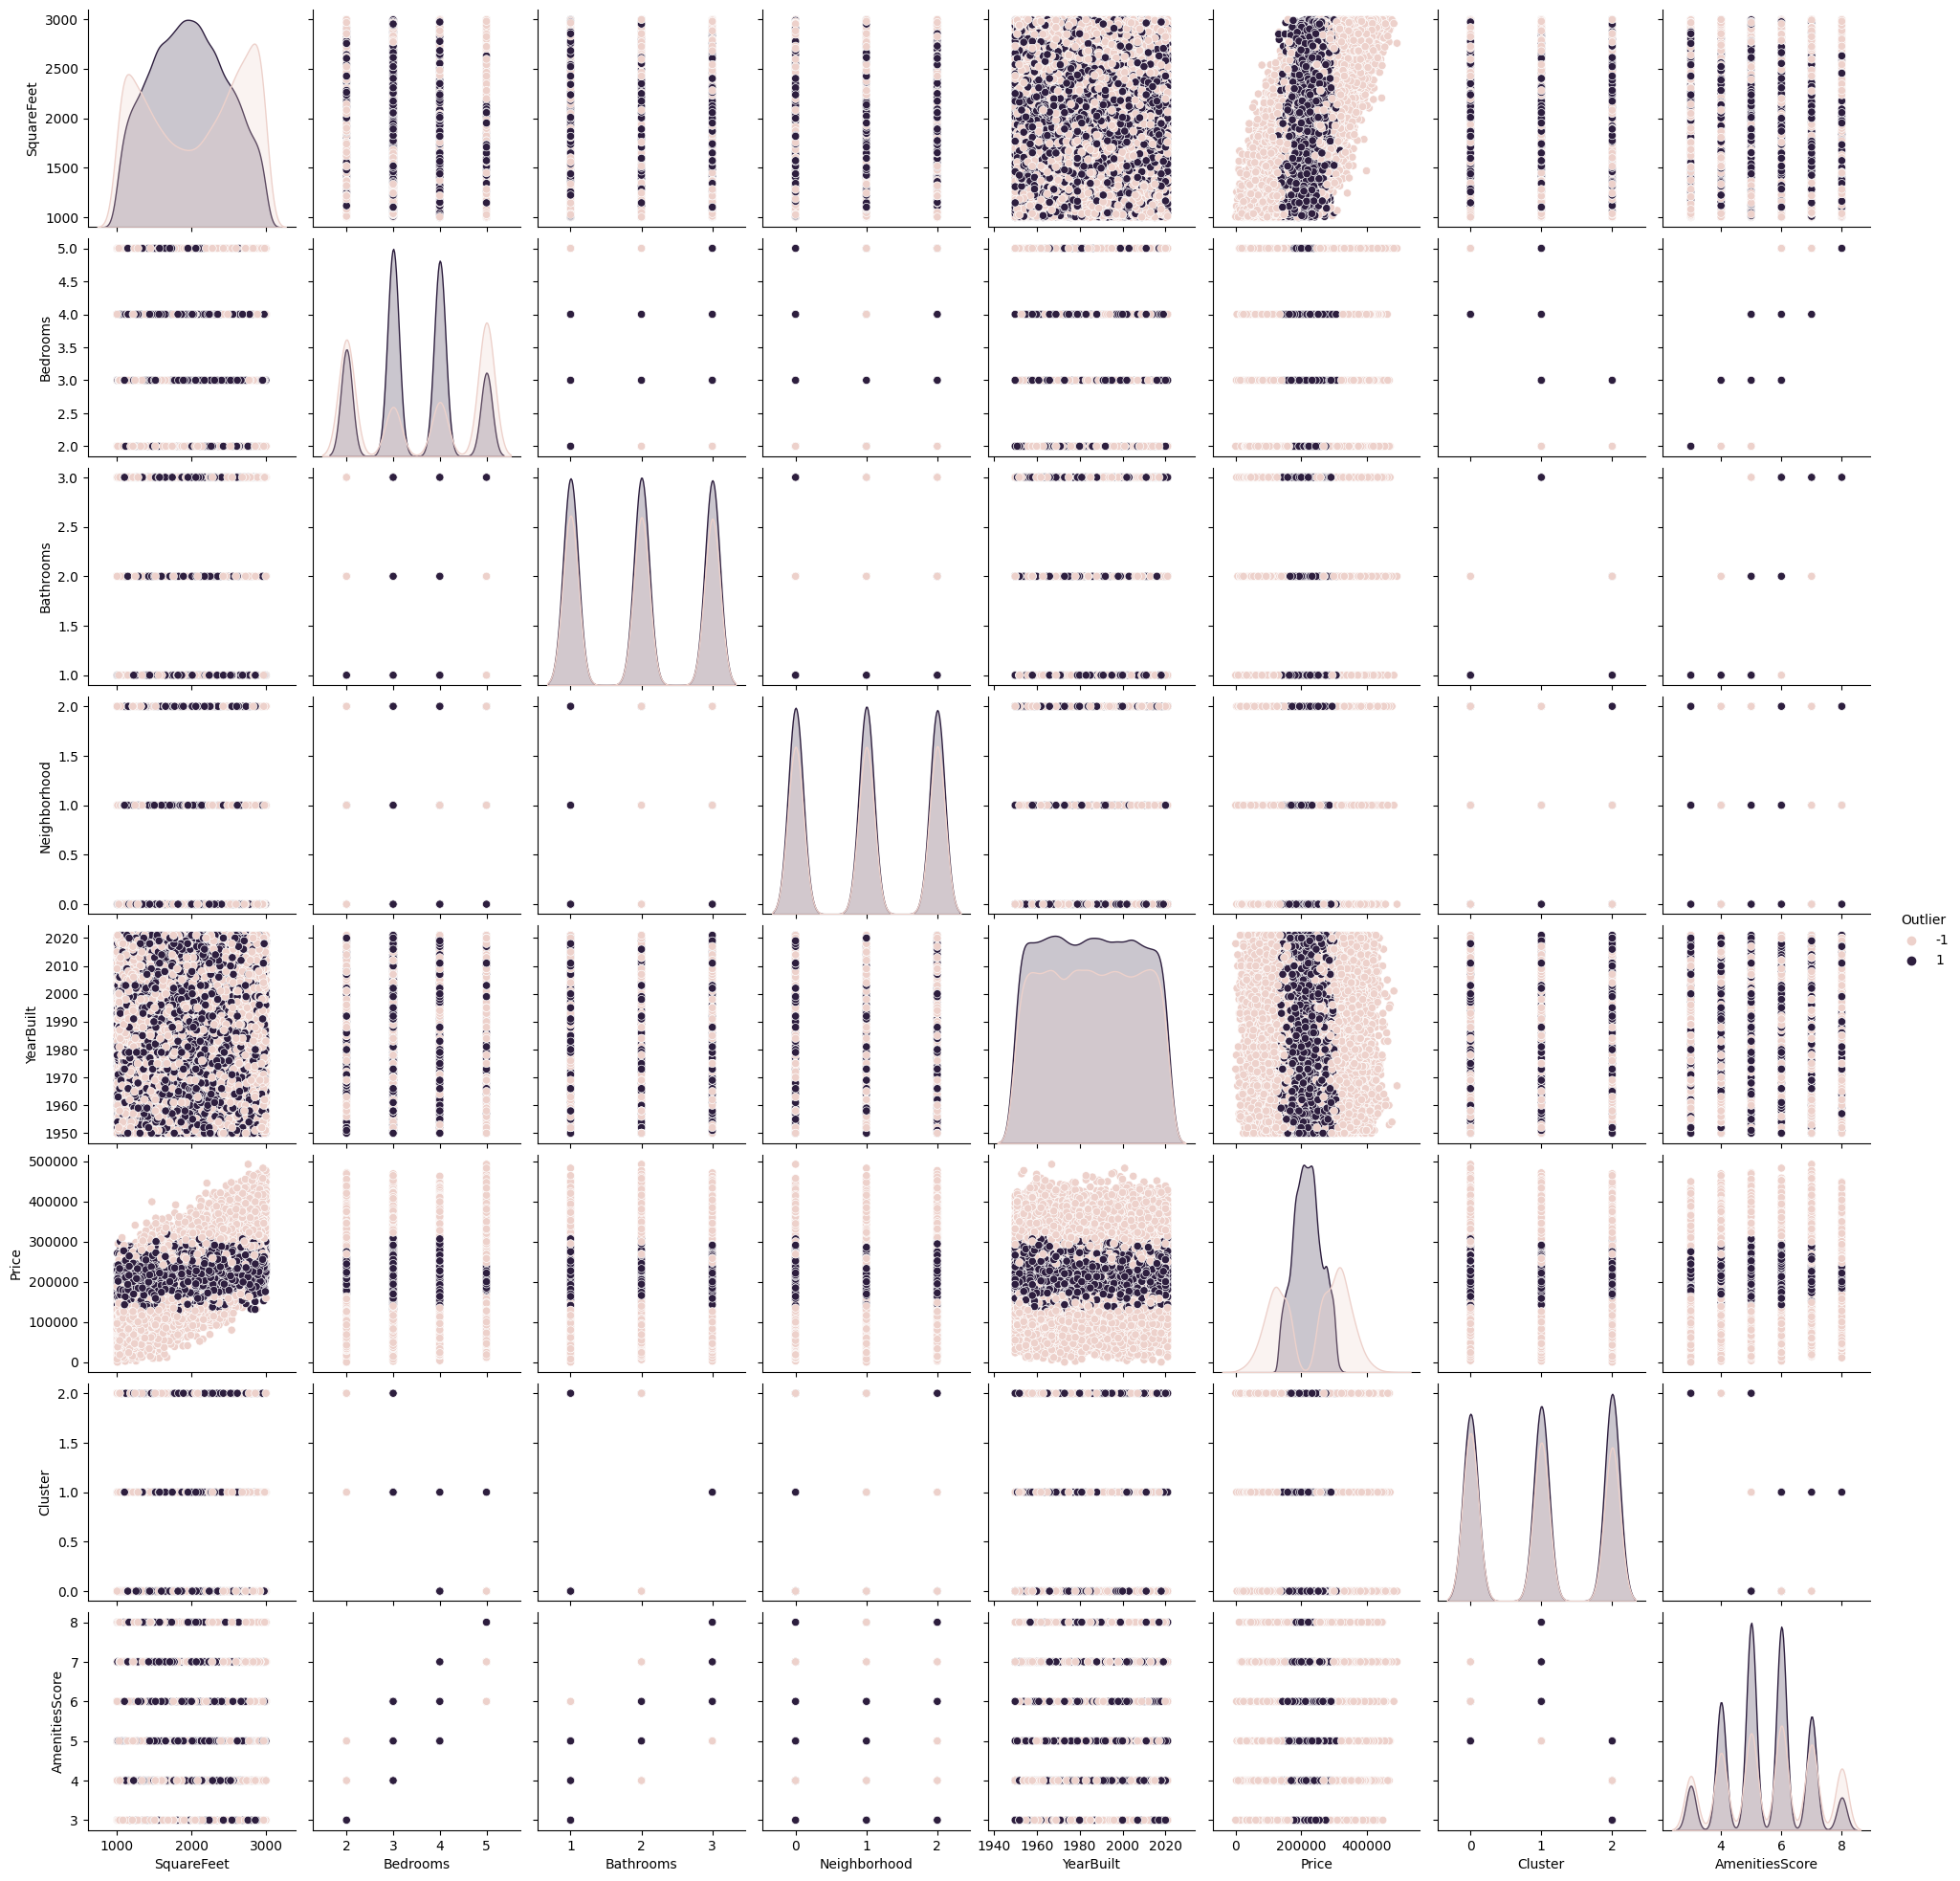

In [39]:
sns.pairplot(df, hue='Outlier', diag_kind='kde')
plt.show()

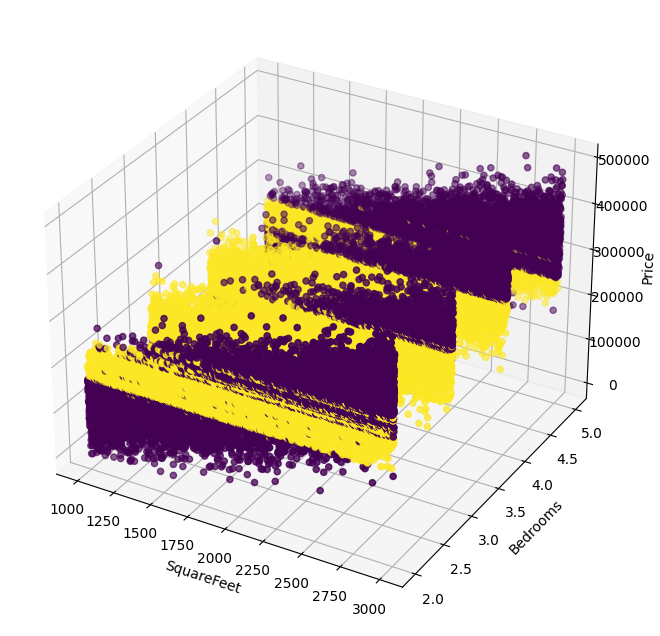

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['SquareFeet'], df['Bedrooms'], df['Price'], c=df['Outlier'], marker='o')
ax.set_xlabel('SquareFeet')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

plt.show()


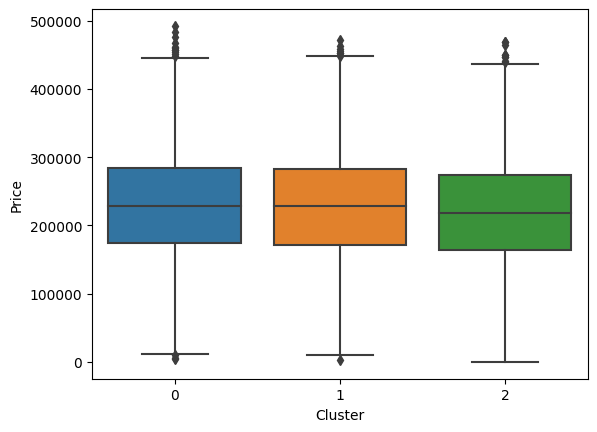

In [46]:
sns.boxplot(x='Cluster', y='Price', data=df)
plt.show()


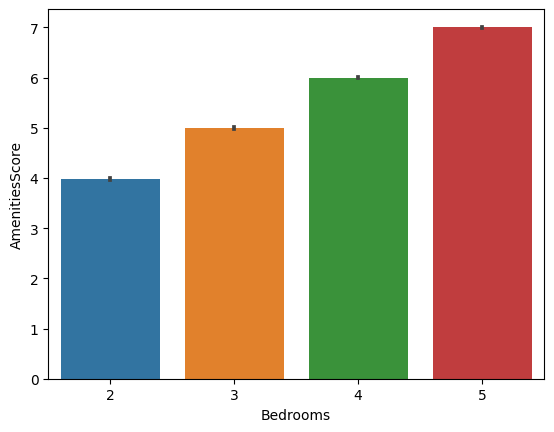

In [47]:
sns.barplot(x='Bedrooms', y='AmenitiesScore', data=df)
plt.show()


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X=df.drop(['YearBuilt','Price'],axis=1)
y=df['Price']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [51]:
print(X_train.shape)

(34984, 7)


In [52]:
print(X_test.shape)

(14994, 7)


In [53]:
print(y_train.shape)

(34984,)


In [54]:
print(y_test.shape)

(14994,)


In [55]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2446977475.7204685
